# Week 3

## Logistic Regression

Switching from regression to *classification* problems. It is called logistic *regression* for historical reasons, but is actually an apporach to classification problems.

## Binary Classification

Instead of output $\vec{y}$ being continuous range of values, it will only be 0 or 1.

$$y \in \{ 0, 1 \}$$

Where $0$ usually denotes the "negative class" and $1$ the "positive class" (but this is arbitrary).

One method is to use linear regression and map all predictions greater than 0.5 to 1, and all less than 0.5 to 0. This will not work well because classification is not actually a linear function.

Our hypothesis should satisfy

$$ 0 \le h_\theta(x) \le 1 $$

The sigmoid function (logistic function) is a great function to use here as it maps any real number to the (0, 1) interval:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

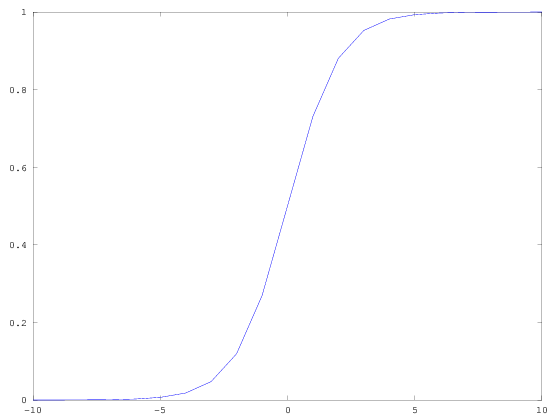

In [20]:
g = @(z) 1 ./ (1 + e.^-z);

x = -10:10;
plot(x, g(x));

We see that if $z$ is zero, then $e^0 = 1$ so we get $g(0) = \frac{1}{1 + 1} = \frac{1}{2}$.

If $z \rightarrow \infty$, then $e^{-\infty} \rightarrow 0$ so we get $g(\infty) = \frac{1}{1 + 0} = 1$.

If $z \rightarrow -\infty$, then $e^{-\infty} \rightarrow \infty$ so we get $g(-\infty) = \frac{1}{1 + \infty} = 0$.

We can get a new hypothesis function with values between 0 and 1 using $g(z)$:

$$ h_\theta(x) = g(\theta^T x) $$

Substituting the sigmoid function gives us

$$ h_\theta(x) = \frac{1}{1 + e^{-(\theta^T x)} } $$

$h_\theta(x)$ will give us the **probability** that our output is 1, thus

$$ h_\theta(x) = P(y = 1 \rvert x;\theta) $$

Read as "the probability that y is 1, given x and paramterized by theta".

## Decision Boundary

In order to get discrete values, we can translate the output from the hypothesis function as:

$$ h_\theta(x) \ge 0.5 \rightarrow y = 1 \\ h_\theta(x) \lt 0.5 \rightarrow y = 0$$

Looking at the sigmoid function above we see that the output is above 0.5 when $z \ge 0$.

Thus we can see that 

$$ \theta^T x \ge 0 \implies y = 1 \\ \theta^T x \lt 0 \implies y = 0 $$

The **decision boundary** is the the line that separates the area where y = 0 and where y = 1. It is created by our hypothesis function.

Note: the input to the sigmoid function $g(z)$ (e.g. $\theta^T X$) doesn't need to be linear, and could be a function that describes a circle ($z = \theta_0 + \theta_1x_1^2 + \theta_2x_2^2$).

## Cost Function

We cannot use the same cost function as the logistic function will give a non convex cost function (many local optimal minima).

Instead we use the following cost function:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m Cost(h_\theta(x^{(i)}), y^{(i)}) $$

Where $Cost$ is

$$ \begin{align} Cost(h_\theta(x), y) & = -\log(h_\theta(x)) \text{, if } y = 1 \\ Cost(h_\theta(x), y) & = -\log(1 - h_\theta(x)) \text{, if } y = 0 \end{align} $$

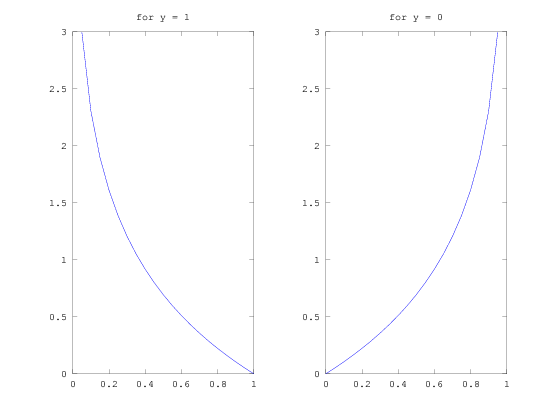

In [57]:
x = 0.0:0.05:1.0;
subplot(1, 2, 1);
plot(x, -log(x));
title('for y = 1');
subplot(1, 2, 2);
plot(x, -log(1 - x));
title('for y = 0');

We see that these are convex functions with value 0 at the correct output, and increases rapidly as we move away from the correct value.

We can combine these two cases into a more compact form:

$$ Cost(h_\theta(x), y) = -y \log(h_\theta(x)) - (1 - y)\log(1 - h_\theta(x)) $$

Note that when y = 1, the second term will be cancelled out, and when y = 0, the first term is cancelled out.

We can now fully write out the cost function:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m [ y^{(i)} \log (h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) ] $$

A vectorized version:

$$ J(\theta) = \frac{1}{m} \big( -y^T \log(h) - (1 - y)^T \log(1 - h) \big) $$

where $h = g(X\theta)$.

In [65]:
function val = J(theta, X, y)
    m = length(y);
end

## Gradient Descent

Remember general form of gradient descent rule:

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta) $$

"We" can work out the derivative part using calculus to get:

$$ \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$

Note that this is same as with linear regression (but $h_\theta(x)$ isn't the same).

A vectorized implementation:

$$ \theta := \theta - \frac{\alpha}{m} X^T (g(X\theta) - \vec{y}) $$

## Advanced Optimization

More sophisticated (and faster) ways to optimize $\theta$ instead of gradient descent:
- Conjugate gradient
- BFGS
- L-BFGS

These are faster and better, but more complicated (so you shouldn't try to implement them on your own).
Octave provides them.

To use them we first need to provide a function that calculates the cost and gradient (partial derivative) for a given input $\theta$.

In [63]:
function [jVal, gradient] = costFunction(theta)
    % jVal = [ code to compute J(theta) ]
    % gradient = [ code to compute derivative of J(theta) ]
end

Next we use octave's `optimset()` to create an object containing the options we want to use.

And finally call `fminunc()`.

In [62]:
% GradObj is on since we will supply the gradient.
options = optimset('GradObj', 'on', 'MaxIter', 100);

initTheta = zeros(2, 1);

[theta, fVal, flag] = fminunc(@costFunction, initTheta, options)

    costFunction at line 4 column 1
    fminunc at line 162 column 8
theta =

   0
   0

fVal = [](0x0)
flag =  1
